In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import quad

# PHYS512 Assignment 1

## Question 1

### a)

We have four points $f(x \pm \delta)$ and $f(x \pm 2\delta)$.
When doing the Taylor expansion we get:

$$f(x \pm \delta) = f(x) \pm \delta f'(x) + \frac{\delta^2}{2}f''(x) \pm \frac{\delta^3}{6}f'''(x) + \frac{\delta^4}{24}f^{4}(x) \pm   \frac{\delta^5}{120}f^{5}(x) + \epsilon_{1\pm} f(x)$$


$$f(x \pm 2\delta) = f(x) \pm 2\delta f'(x) + 2\delta^2f''(x) \pm \frac{4\delta^3}{3}f'''(x) + \frac{2\delta^4}{3}f^{4}(x) \pm   \frac{4\delta^5}{15}f^{5}(x) + \epsilon_{2\pm} f(x)$$

Where $\epsilon_{1\pm,2\pm}f(x)$ are roundoff error terms from the computer accuracy. 
Combining the expansions, we can obtain:

$$(1) \: \: f(x+\delta)-f(x-\delta) = 2\delta f'(x) + \frac{\delta^3}{3}f'''(x) + \frac{\delta^5}{60}f^{5}(x) + \epsilon_1 f(x) $$

$$(2) \: \: f(x+2\delta)-f(x-2\delta) = 4\delta f'(x) + \frac{8\delta^3}{3}f'''(x) + \frac{8\delta^5}{15}f^{5}(x) + \epsilon_2 f(x) $$

From (2) we can retrieve an expression for $\frac{\delta^3}{3}f'''(x)$ which we then plug back into (1) to obtain:

$$f(x+\delta)-f(x-\delta)= \frac{3}{2}\delta f'(x) + \frac{1}{8}\left[f(x+2\delta) - f(x-2\delta)\right] - \frac{3\delta^5}{20}f^5(x) + \epsilon f(x)$$


$$\to f'(x) = \frac{1}{12\delta}\left[f(x-2\delta) - f(x+2\delta)\right] + \frac{2}{3\delta}\left[f(x+\delta) - f(x-\delta)\right] +\frac{\delta^4}{10}f^5(x) + \epsilon f(x)$$

Where $\frac{\delta^4}{10}f^5(x) + \epsilon f(x)$ is the combined error term from truncation and roundoff.

### b)

From a), we get that the error term in the derivative is:

$$error = \frac{\delta^4}{10}f^5(x) + \epsilon f(x)$$

To find $\delta$, we need to minimize this error term, i.e.:

$$ \frac{\partial error} {\partial \delta} = 0$$

$$\to \frac{2}{5}\delta^3 f^5(x) - \frac{2}{3}\frac{\epsilon f(x)}{\delta^2} = 0 $$

$$ \delta^5 f^5(x) = \frac{5}{3}\epsilon f(x)$$

Finally, we obtain:

$$ \delta = \sqrt[5]{\frac{5}{3}\frac{\epsilon f(x)}{f^5(x)}}$$


Below we show what $\delta$ is for $e^x$ and $e^{0.01x}$:

In [2]:
x0 = 0
ϵ = 2**-53 #for double precision

# To get δ for exp(x):
f = np.exp(x0) #function f(x)
f_5 = np.exp(x0) #fifth derivative of f(x)
δ_1 = (5/3 * ϵ * f/f_5)**(1/5)
print(f'Minimum delta for exp(x) is {δ_1:.4f}')

Minimum delta for exp(x) is 0.0007


This value of $\delta$ is the same order of magnitude as the value computed below for exp(x): dx ~ 0.0009

In [3]:
# To get δ for exp(0.01x):
f = np.exp(1) #function f(x)
f_5 = 1e-10 * np.exp(0.01) #fifth derivative of f(x)
δ_2 = (5/3 * ϵ * f/f_5)**(1/5)
print(f'Minimum delta for exp(0.01x) is {δ_2:.2f}')

Minimum delta for exp(0.01x) is 0.09


This value of $\delta$ is the same order of magnitude as the value computed below for exp(0.01x): dx ~ 0.07

#### Below is the code to check if the estimates of delta are roughly correct

In [4]:
#Defining the two exponential functions to verify the errors
def fun1(x):
    return np.exp(x)

def fun2(x):
    return np.exp(0.01*x)

In [5]:
#Set up the function derived above:
def deriv(fun, x, δ):
    #f(x +- δ):
    fdx = fun(x+δ)
    fdx_ = fun(x-δ)

    #f(x +- 2δ):
    f2dx = fun(x+2*δ)
    f2dx_ = fun(x-2*δ)

    #computed approximation
    deriv = 1/(12*δ) * (f2dx_ - f2dx) + 2/(3*δ) * (fdx - fdx_)
    
    return deriv

In [6]:
#For exp(x):
#array of different values of dx
dx = np.linspace(1.0e-9, 1.0, 100000, dtype='float64')

#True value to compare with:
y_true = np.exp(0)

#first derivative of exp(x) around 0 using the above function
deriv_exp1 = deriv(fun1, 0., dx)

#Get the error by comparing the true value of the derivative of exp(0)
err1 = np.abs(y_true-deriv_exp1)

#value of δ which minimizes the error:
min_dx1 = dx[np.argmin(err1)]
print(f'This is the value of dx which minimizes the error for exp(x): {min_dx1:.4f}')

This is the value of dx which minimizes the error for exp(x): 0.0009


In [7]:
#For exp(0.01x):
#array of different values of dx
dx = np.linspace(1.0e-9, 1.0, 100000, dtype='float64')

#True value to compare with:
y_true = np.exp(0.01)*0.01

#first derivative of exp(x) around 1. using the above function
deriv_exp2 = deriv(fun2, 1., dx)

#Get the error by comparing the true value of the derivative of exp(0.01)
err2 = np.abs(y_true-deriv_exp2)

#value of δ which minimizes the error:
min_dx2 = dx[np.argmin(err2)]
print(f'This is the value of dx which minimizes the error for exp(0.01x): {min_dx2:.2f}')

This is the value of dx which minimizes the error for exp(0.01x): 0.07


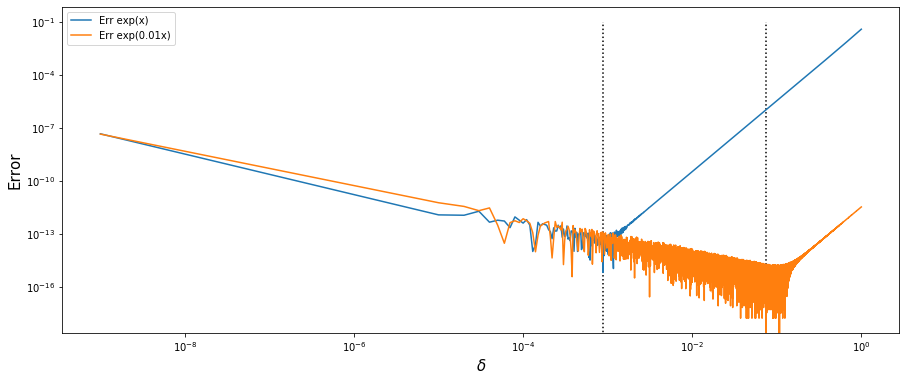

In [8]:
plt.figure(figsize=(15, 6))

plt.loglog(dx, err1, label='Err exp(x)')
plt.loglog(dx, err2, label='Err exp(0.01x)')
plt.ylabel('Error', fontsize=15)
plt.xlabel(r'$\delta$', fontsize=15)
plt.vlines(min_dx1, 0, 1e-1, linestyle=':')
plt.vlines(min_dx2, 0, 1e-1, linestyle=':')
plt.legend()

# Question 2

In [9]:
lakeshore = np.loadtxt('lakeshore.txt')
temp, voltage, dvdt = lakeshore.T[0], lakeshore.T[1], lakeshore.T[2]

v = voltage[::-1]
t = temp[::-1]

In [10]:
def CubSpline(x0,y0,x):
    cs = CubicSpline(x0, y0) #returns a function takes the x values to interpolate as argument
    y = cs(x)
    return y

In [15]:
#Interpolate a large array of voltage values into temperatures:
x = np.linspace(v[0], v[-1], 1000)
y = CubSpline(v, t, x)

In [16]:
#define half the points as 'true' values:
x_t = x[::2]
#define the other half as 'experimental' values:
x_e = x[1::2]

#Interpolate both lists:
y_t = CubSpline(v, t, x_t)
y_e = CubSpline(v, t, x_e)

#an upper bound on the error is the maximum difference between the "true" interpolated values and "experimental" ones:
error = max(np.abs(y_t-y_e))

As the maximum difference between two y interpolated points, a rough estimate of the error is ~ 1K.

In [17]:
#Example voltage to interpolate:
v0 = 0.5 
#Interpolated temperature:
t0 = CubSpline(v, t, v0)

print(f'For {v0}V, the temperature is: {t0:.2f} +/- {error:.2f} K.')

For 0.5V, the temperature is: 325.75 +/- 0.98 K.


Below is a plot showing the interpolated array computed above compared the data:

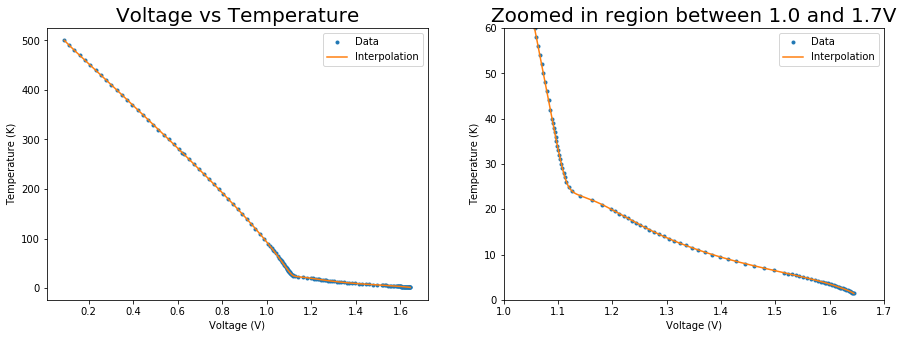

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
x = np.linspace(v[0], v[-1], 1000)
plt.plot(v, t, '.', label='Data')
plt.plot(x, CubSpline(v, t, x), '-',label='Interpolation')
plt.ylabel('Temperature (K)')
plt.xlabel('Voltage (V)')
plt.title('Voltage vs Temperature', fontsize=20)
plt.legend()

plt.subplot(1,2,2)
x = np.linspace(v[0], v[-1], 1000)
plt.plot(v, t, '.', label='Data')
plt.plot(x, CubSpline(v, t, x), '-',label='Interpolation')
plt.ylabel('Temperature (K)')
plt.xlabel('Voltage (V)')
plt.xlim(1.0, 1.7)
plt.ylim(0,60)
plt.title('Zoomed in region between 1.0 and 1.7V', fontsize=20)
plt.legend()

# Question 3

### Functions:

In [18]:
def PolFit(x, xi, yi, order):
    y = np.zeros(len(x))
    for i in range(len(x)):  
        #for each x, get the biggest xi inferior to it (i.e. the xi directly to its left)
        ind=np.max(np.where(x[i]>=xi)[0]) 
        
        #get the 4 x points surrounding it, as well as the 4 y corresponding values
        x_use=xi[ind-1:ind+3]
        y_use=yi[ind-1:ind+3]
        
        #Get the polynomial coefficients
        coeffs=np.polyfit(x_use,y_use,order)
        #Get the interpolated values
        y[i] =  np.polyval(coeffs,x[i])
        
    return y

In [19]:
def CubSpline(x0,y0,x):
    cs = CubicSpline(x0, y0)
    y = cs(x)
    return y

In [20]:
def rat_fit1(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    #make x by y 0-matrix:
    mat=np.zeros([n+m-1,n+m-1]) 
    #Setting up the matrix
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    # coeffs = M^-1 · y
    pars=np.dot(np.linalg.inv(mat),y) #np.linalg.inv gets the inverse of the matrix
    p=pars[:n]
    q=pars[n:]
    return p,q


def rat_fit2(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    #make x by y 0-matrix:
    mat=np.zeros([n+m-1,n+m-1]) 
    #Setting up the matrix
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    # coeffs = M^-1 · y
    pars=np.dot(np.linalg.pinv(mat),y) #np.linalg.pinv gets the inverse of the matrix, even when the determinant is 0
    p=pars[:n]
    q=pars[n:]
    return p,q


def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

### For cos(x):

In [21]:
#values to interpolate from
xi=np.linspace(-np.pi/2,np.pi/2,10)
yi=np.cos(xi)

#x values to interpolate
#for the polynomial interp:
x_p=np.linspace(xi[1],xi[-2],1001)
#for the cubic spline interp:
x_c= np.linspace(xi[1],xi[-2],1001)
#for the rational function interp:
x_r= np.linspace(xi[0],xi[-1],1001)


#true values of the function
y_tp = np.cos(x_p)
y_tc = np.cos(x_c)
y_tr = np.cos(x_r)


#Interpolated values
#for the polynomial interp:
y_p = PolFit(x_p, xi, yi, 3)
#for the cubic spline interp:
y_c = CubSpline(xi,yi,x_c)
#for the rational function interp:
n = 5
m = 6
p, q = rat_fit1(xi,yi, n,m)
y_r = rat_eval(p,q,x_r)


print(f'My rms error for the polynomial interpolation is {np.std(y_p-y_tp)}')
print(f'My rms error for the cubic spline interpolation is {np.std(y_c-y_tc)}')
print(f'My rms error for the rational function interpolation is {np.std(y_r-y_tr)}')

My rms error for the polynomial interpolation is 9.370160884865887e-05
My rms error for the cubic spline interpolation is 1.7791380811451803e-05
My rms error for the rational function interpolation is 1.2191776950968728e-07


/Users/capucinebarfety/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned


Using the same number of points (10) in all three methods, we obtain the above errors in the results. 

In [22]:
print('The coefficients for the rational function are: \n')
print(f'p = {p}')
print(f'q = {q}.')

The coefficients for the rational function are: 

p = [ 9.99999990e-01  0.00000000e+00 -4.55433246e-01  3.63797881e-12
  2.03244279e-02]
q = [-7.27595761e-12  4.45663741e-02 -4.54747351e-13  9.42994595e-04
  0.00000000e+00].


#### Plot for the Polynomial interpolation:

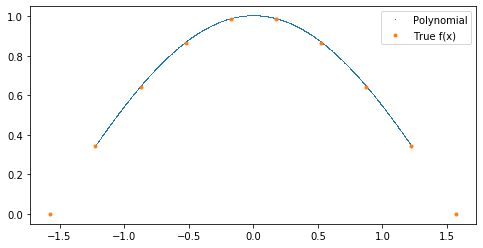

In [23]:
plt.figure(figsize=(8,4))
plt.plot(x_p, y_p, ',', label='Polynomial')
plt.plot(xi, yi, '.', label='True f(x)')
plt.legend()

#### Plot for the Cubic Spline Interpolation:

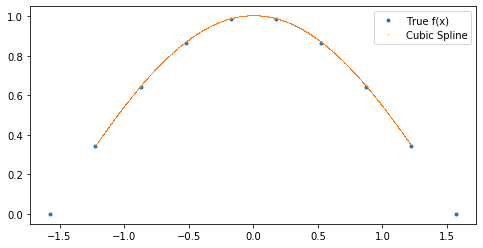

In [24]:
plt.figure(figsize=(8, 4))
plt.plot(xi,yi,'.', label='True f(x)')
plt.plot(x_c, y_c, ',', label='Cubic Spline')
plt.legend()

#### Plot for the Rational function interpolation:

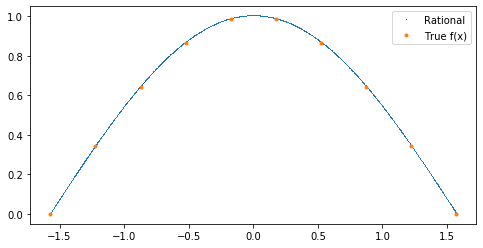

In [25]:
plt.figure(figsize=(8,4))
plt.plot(x_r, y_r, ',', label='Rational')
plt.plot(xi, yi, '.', label='True f(x)')
plt.legend()

## For the Lorentzian:

In [26]:
#values to interpolate from
xi = np.linspace(-1,1,4)
yi = 1/(1 + xi**2)

#x values to interpolate
#for the polynomial interp:
x_p=np.linspace(xi[1],xi[-2],1001)
#for the cubic spline interp:
x_c= np.linspace(xi[0],xi[-1],1001)
#for the rational function interp:
x_r= np.linspace(xi[0],xi[-1],1001)


#true values of the function
y_tp = 1/(1 + x_p**2)
y_tc = 1/(1 + x_c**2)
y_tr = 1/(1 + x_r**2)


#Interpolated values
#for the polynomial interp:
y_p = PolFit(x_p, xi, yi, 2)
#for the cubic spline interp:
y_c = CubSpline(xi,yi,x_c)
#for the rational function interp:
n = 2
m = 3
p, q = rat_fit1(xi,yi, n,m)
y_r = rat_eval(p,q,x_r)


print(f'My rms error for the polynomial interpolation is {np.std(y_p-y_tp)}')
print(f'My rms error for the cubic spline interpolation is {np.std(y_c-y_tc)}')
print(f'My rms error for the rational function interpolation is {np.std(y_r-y_tr)}')

My rms error for the polynomial interpolation is 0.015378919569636799
My rms error for the cubic spline interpolation is 0.03701158719356621
My rms error for the rational function interpolation is 8.771443333073141e-17


In [27]:
print('The coefficients for the rational function are: \n')
print(f'p = {p}')
print(f'q = {q}.')

The coefficients for the rational function are: 

p = [1. 0.]
q = [0. 1.].


Looking at the Lorentzian:
$$f(x) = \frac{1}{1+x^2} $$

And the rational function:

$$f_r(x) = \frac{p_0 + p_1x + ...}{1 + q_0x + q_1x^2 + ...} $$

Where in this case $p_1 = q_0 = 0$ and $p_0 = q_1 = 1$.
The rational function approximation of the Lorentzian is therefore exact, and the only error on the approximation stems from the computer accuracy. This agrees with the error in the interpolation above: $\sim 9 e -17$.

#### Plot for the Polynomial interpolation:

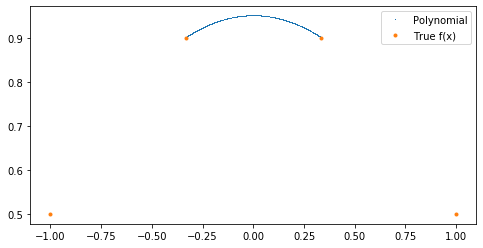

In [28]:
plt.figure(figsize=(8,4))
plt.plot(x_p, y_p, ',', label='Polynomial')
plt.plot(xi, yi, '.', label='True f(x)')
plt.legend()

#### Plot for the Cubic Spline Interpolation:

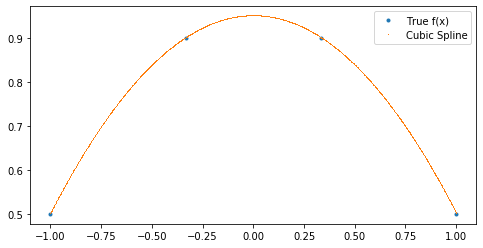

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(xi,yi,'.', label='True f(x)')
plt.plot(x_c, y_c, ',', label='Cubic Spline')
plt.legend()

#### Plot for the Rational function interpolation:

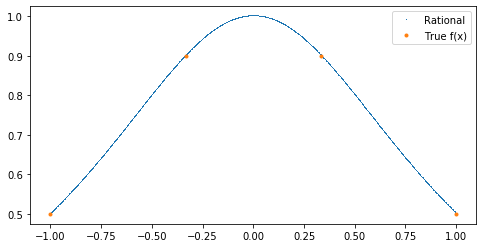

In [30]:
plt.figure(figsize=(8,4))
plt.plot(x_r, y_r, ',', label='Rational')
plt.plot(xi, yi, '.', label='True f(x)')
plt.legend()

### Increasing the orders of the rational function:

For increasing orders (like n=4, m=5), we expect the error in the approximation to still be dominated by the machine precision. However, when increasing the orders using the current code, the matrix becomes singular and the code can no longer inverse it properly, as shown below.
We show the behavior of the rational approximation in the next section, after changing np.linalg.inv to np.linalg.pinv; and show that the error is still of order of magnitude $\sim 10^{-15}$.

 - When increasing the order to n=4, m=5; the result is the following:

In [31]:
#orders
n = 4
m = 5

#values to interpolate from
xi=np.linspace(-1,1, n+m-1)
yi = 1/(1 + xi**2)

#x values to interpolate
x_r = np.linspace(xi[0],xi[-1],1001)

#true values of the function
y_true = 1/(1 + x_r**2)
p, q = rat_fit1(xi,yi, n,m)
y_r = rat_eval(p,q,x_r)

print('My rms error for the Lorentzian is',np.std(y_r-y_true))

My rms error for the Lorentzian is 2.0661398497007206


In [32]:
print('The coefficients for the rational function are: \n')
print(f'p = {p}')
print(f'q = {q}.')

The coefficients for the rational function are: 

p = [ 2.30752097  5.          7.         -3.89449214]
q = [ 6.   9.  -4.5  8. ].


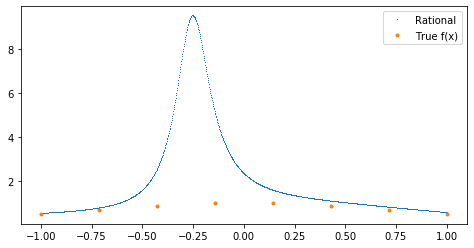

In [33]:
plt.figure(figsize=(8,4))
plt.plot(x_r, y_r, ',', label='Rational')
plt.plot(xi, yi, '.', label='True f(x)')
plt.legend()

### Changing np.linalg.inv to np.linalg.pinv

In [34]:
#orders
n = 4
m = 5

#values to interpolate from
xi=np.linspace(-1,1, n+m-1)
yi = 1/(1 + xi**2)

#x values to interpolate
x_r = np.linspace(xi[0],xi[-1],1001)

#true values of the function
y_true = 1/(1 + x_r**2)


p, q = rat_fit2(xi,yi, n,m)
y_r = rat_eval(p,q,x_r)

print('My rms error for the Lorentzian is',np.std(y_r-y_true))

My rms error for the Lorentzian is 1.1158664807637838e-15


In [35]:
print('The coefficients for the rational function are: \n')
print(f'p = {p}')
print(f'q = {q}.')

The coefficients for the rational function are: 

p = [ 1.00000000e+00  1.77635684e-15 -3.33333333e-01  0.00000000e+00]
q = [ 0.00000000e+00  6.66666667e-01 -1.77635684e-15 -3.33333333e-01].


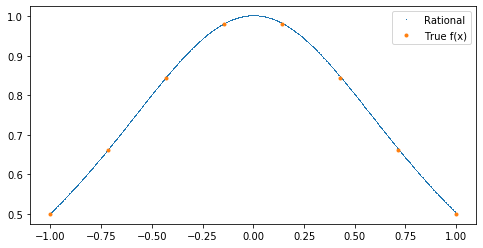

In [36]:
plt.figure(figsize=(8,4))
plt.plot(x_r, y_r, ',', label='Rational')
plt.plot(xi, yi, '.', label='True f(x)')
plt.legend()

We can understand what happened by looking at the coefficients as they no longer approximate a lorentzian function, especially $p_0$ and $q_0$. Therefore, the interpolation blows up, as seen in the plot above. This happens because the determinant of the matrix is 0, (i.e. it's a singular matrix). Trading the np.linalg.inv for a function capable of handling singuler matrices therefore allows the correct estimation of the coefficients, as shown above, and thus an interpolate accurate to the machine's precision, as shown in the plot.

## Question 4:

Using the integral from Pb 2.7 in Griffiths, the electrical field of an infinitessimally small spherical shell can be defined as:


$$E(z) = \frac{R^2 \sigma}{2 \epsilon_0} \int^\pi_0 \frac{z-Rcos\theta}{(R^2 + z^2 - 2Rzcos \theta)^{3/2}}sin\theta d\theta$$

In [37]:
R = 10 #radius of the sphere
z_r = np.linspace(0, 2*R, 101) #z values

In [38]:
#set up the integral:
def E_z(θ, z):
    E = R**2 * np.sin(θ) *(z - R*np.cos(θ))/(R**2 + z**2 - 2*R*z*np.cos(θ))**(3/2.)  
    return E

In [39]:
#define the integrator
def Integrator(fun,z,a,b,tol):
    
    #interval split into 4 ranges
    x=np.linspace(a,b,5)
    
    #get y values for the above x values
    y=fun(x, z)
    
    #evaluate the integral using Simpson's rule.
    f1 = (y[0] + 4*y[2] + y[4]) / 6.* (b-a)
    f2 = (y[0] + 4*y[1] + 2*y[2] + 4*y[3]+y[4]) / 12.*(b-a)
    
    #error:
    myerr=np.abs(f2 - f1)
    
    #if error small enough
    if (myerr < tol):
        #return the answer
        return (16.0*f2-f1)/15.0,myerr
    
    else:
        #divide the interval in two
        mid=0.5*(b+a)
        
        #re-evaluate the integral over each of the two new intervals
        f_left,err_left = Integrator(fun, z, a, mid, tol/2.0)
        f_right,err_right = Integrator(fun, z,  mid, b, tol/2.0)
        
        #get total integral and err
        f=f_left+f_right
        err=err_left+err_right
        
        return f,err

In [40]:
#Evaluating the integral of the function using Integrator:
Ez = []
err_Ez = []
for i in range(len(z_r)):
    #to deal with the presence of a singularity, if the code raises a RuntimeError, set the value of the integral to infinity.
    try:
        Ez.append(Integrator(E_z, z_r[i], 0, np.pi, 1e-7)[0])
        err_Ez.append(Integrator(E_z, z_r[i], 0, np.pi, 1e-7)[1])
    except(RuntimeError):
        print('There is a singularity in the integral that the integrator cannot compute. Replace with infinity.')
        Ez.append(np.inf)
        err_Ez.append(0)

        
#Evaluating the integral of the function using scipy.integrate.quad:
quad_Ez = []
err_quad_Ez = []
for i in range(len(z_r)):
    quad_Ez.append(quad(E_z, 0, np.pi, z_r[i])[0])
    err_quad_Ez.append(quad(E_z, 0, np.pi, z_r[i])[1])

/Users/capucinebarfety/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


There is a singularity in the integral that the integrator cannot compute. Replace with infinity.


When z = R, Integrator crashes because at this point the integrand becomes, when $\theta = 0$, the denominator of the function is 0, resulting in a RuntimeWarning. The scipy function quad does not appear to have a problem with it, whereas our function, using Simpson's rule, tries to evaluate the integral at its lower bound where $\theta = 0$.

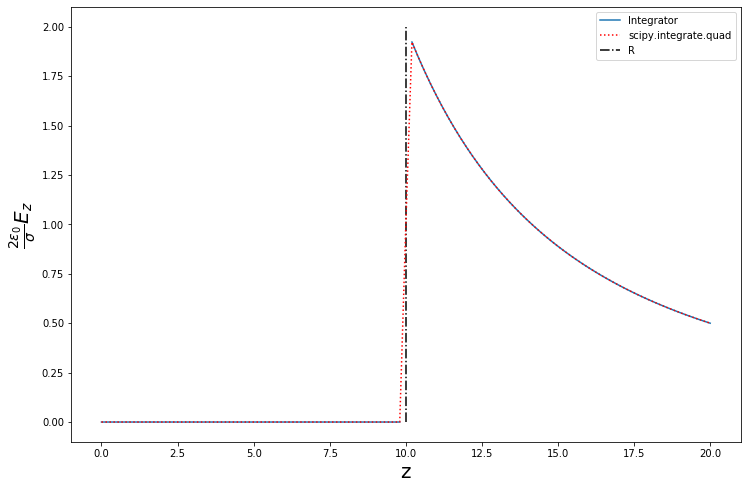

In [41]:
plt.figure(figsize=(12,8))
plt.plot(z_r, np.array(Ez), label='Integrator')
plt.plot(z_r, np.array(quad_Ez),':', color='r',label='scipy.integrate.quad')
plt.ylabel(r'$\frac{2\epsilon_0}{\sigma}E_z$', fontsize=20)
plt.xlabel(r'z', fontsize=20)
plt.vlines(R, 0,2, 'k', '-.', label='R')
plt.legend()